# INSTALLATION

In [1]:
!add-apt-repository ppa:sumo/stable
!apt-get update
!apt-get install sumo sumo-tools sumo-doc

 SUMO is a highly portable, microscopic traffic simulation package designed to handle large road networks. SUMO is open source, licensed under the EPLv2.
 More info: https://launchpad.net/~sumo/+archive/ubuntu/stable
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [82.8 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,346 kB]
Hit:10 http://ppa.la

In [2]:
import os
os.environ['SUMO_HOME'] = "/usr/share/sumo"

In [3]:
!git clone https://github.com/LucasAlegre/sumo-rl

Cloning into 'sumo-rl'...
remote: Enumerating objects: 2898, done.
remote: Counting objects: 100% (660/660), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 2898 (delta 493), reused 544 (delta 440), pack-reused 2238
Receiving objects: 100% (2898/2898), 42.11 MiB | 19.48 MiB/s, done.
Resolving deltas: 100% (1391/1391), done.


In [4]:
%cd sumo-rl

/content/sumo-rl


In [5]:
!pip install sumo-rl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.7/826.7 kB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 15.7 MB/s eta 0:00:00


In [6]:
!pip install "stable_baselines3[extra]>=2.0.0a9"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 28.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.3 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=95237fa43365fc5112daa6139c3175759035a390d930310e798a170bb8b33b50
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [7]:
!pip show "stable_baselines3"

Name: stable-baselines3
Version: 2.0.0
Summary: Pytorch version of Stable Baselines, implementations of reinforcement learning algorithms.
Home-page: https://github.com/DLR-RM/stable-baselines3
Author: Antonin Raffin
Author-email: antonin.raffin@dlr.de
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: cloudpickle, gymnasium, matplotlib, numpy, pandas, torch
Required-by: 


# test field

In [ ]:
import gymnasium as gym
import sumo_rl
env = gym.make('sumo-rl-v0',
                net_file='nets/2way-single-intersection/single-intersection.net.xml',
                route_file='nets/2way-single-intersection/single-intersection-vhvh.rou.xml',
                out_csv_name='./outputs/test.csv',
                use_gui=False,
                num_seconds=100)
obs, info = env.reset()
done = False
while not done:
    next_obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
    # print(reward)
    done = terminated or truncated

In [ ]:
import sumo_rl
env = sumo_rl.parallel_env(net_file='/content/sumo-rl/nets/2way-single-intersection/single-intersection.net.xml',
                  route_file='/content/sumo-rl/nets/2way-single-intersection/single-intersection-gen.rou.xml',
                  use_gui=False,
                  num_seconds=100)
observations = env.reset()
print(env.reset())
while env.agents:
    actions = {agent: env.action_space(agent).sample() for agent in env.agents}  # this is where you would insert your policy
    observations, rewards, terminations, truncations, infos = env.step(actions)

 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
({'t': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)}, {'t': {'t_stopped': 0, 't_accumulated_waiting_time': 0.0, 't_average_speed': 1.0}})


In [ ]:
import sumo_rl
env = sumo_rl.parallel_env(net_file='/content/sumo-rl/nets/2way-single-intersection/single-intersection.net.xml',
                  route_file='/content/sumo-rl/nets/2way-single-intersection/single-intersection-vertical.rou.xml',
                  use_gui=False,
                  num_seconds=100)
observations = env.reset()
print(env.reset())
while env.agents:
    actions = {agent: env.action_space(agent).sample() for agent in env.agents}  # this is where you would insert your policy
    observations, rewards, terminations, truncations, infos = env.step(actions)

 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
({'t': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)}, {'t': {'t_stopped': 0, 't_accumulated_waiting_time': 0.0, 't_average_speed': 1.0}})


In [ ]:
tensor([[-2.1212e-01,  5.6232e-04, -1.3597e+00, -1.3791e+00],
        [-3.4789e-01, -1.8729e+00, -1.3085e+00, -6.5220e-01],
        [ 1.4428e-01, -1.5320e+00, -2.2412e+00, -7.7559e-01],
        [-5.1677e-01, -1.1100e+00, -4.5339e-01, -7.7307e-01],
        [-2.8046e-01, -1.9452e+00, -1.6236e+00, -7.4296e-01],
        [-3.1491e-01, -1.6154e+00, -7.3429e-01, -4.6581e-01],
        [-6.0101e-01, -1.1764e+00, -3.8100e-01, -8.7489e-01],
        [-1.3930e-01, -1.6834e+00, -1.3368e+00, -6.2535e-01],
        [-2.1170e-01, -2.6993e-01, -1.0122e+00, -8.3641e-01],
        [-2.8570e+00, -2.6041e+00,  3.9419e+00, -1.5360e+00],
        [-3.4276e-01, -8.9144e-01, -1.1246e+00, -1.0615e+00],
        [-9.3296e-01, -2.6429e+00, -1.4950e-01, -8.0507e-01],
        [-2.5902e-01, -5.9893e-01, -8.0596e-01, -7.0571e-01],
        [-7.6349e-01, -8.8115e-01, -1.6351e+00, -1.5865e+00],
        [-9.6376e-01, -2.7179e+00, -2.7813e-01, -8.3418e-01],
        [ 1.3863e+00, -2.0827e-01, -3.2163e+00, -7.2317e-01],
        [-1.5527e+00, -2.6377e+00,  8.3922e-01, -1.3881e+00],
        [ 2.6221e-01, -1.2276e+00, -1.3575e+00, -7.3001e-01],
        [ 4.2231e-01,  1.1891e+00, -3.6280e+00, -2.2380e+00],
        [ 1.1346e-01, -1.3554e+00, -1.6051e+00, -5.0708e-01],
        [ 6.8516e-01, -5.4402e-01, -2.0536e+00, -4.6630e-01],
        [-5.5810e-01, -1.2509e+00, -1.2216e+00, -9.9805e-01],
        [-2.7896e-01, -6.5159e-01, -5.9826e-01, -6.2690e-01],
        [ 2.1015e-01, -9.4196e-02, -2.4323e+00, -1.5542e+00],
        [ 1.5171e-01, -6.3024e-02, -6.6423e-01, -4.2095e-01],
        [-4.6833e-01, -1.2285e+00, -1.3090e+00, -1.2391e+00],
        [-1.5905e+00, -3.4771e+00,  6.3258e-01, -1.1564e+00],
        [-8.6161e-02, -1.9493e+00, -1.8577e+00, -9.6205e-01],
        [-3.4789e-01, -1.8729e+00, -1.3085e+00, -6.5220e-01],
        [ 6.0378e-02, -3.3346e-01, -1.7508e+00, -1.0928e+00],
        [-1.0275e+00, -1.7572e+00,  4.8526e-02, -1.3674e+00],
        [-2.2552e-01, -1.4631e+00, -9.6232e-01, -4.2225e-01]],
       grad_fn=<AddmmBackward0

# Q-learning

In [ ]:
net = "/content/sumo-rl/nets/2x2grid/2x2.net.xml"
route = "/content/sumo-rl/nets/2x2grid/2x2.rou.xml"

In [ ]:
## HYPERPARAMETERS
min_green = 5
max_green = 99
alpha = 0.1
gamma = 0.99

init_epsilon = 0.05
min_epsilon = 0.005
decay = 1
out_csv = f"outputs/alpha{alpha}_gamma{gamma}_eps{init_epsilon}_decay{decay}"

In [ ]:
from numpy.core.fromnumeric import choose
import numpy as np
from sumo_rl import exploration
from sumo_rl.exploration.epsilon_greedy import EpsilonGreedy
class QLAgent:
    """Q-learning Agent class."""

    def __init__(self, starting_state, state_space, action_space, alpha=0.5, gamma=0.95, exploration_strategy=EpsilonGreedy()):
        """Initialize Q-learning agent."""
        self.state = starting_state
        self.state_space = state_space
        self.action_space = action_space
        self.action = None
        self.alpha = alpha
        self.gamma = gamma
        self.q_table = {self.state: np.zeros(action_space.n)}
        self.exploration = exploration_strategy
        self.acc_reward = 0

    def act(self):
        """Choose action based on Q-table."""
        self.action = self.exploration.choose(self.q_table, self.state, self.action_space)
        return self.action

    def learn(self, next_state, reward, done=False):
        """Update Q-table with new experience."""
        if next_state not in self.q_table:
            self.q_table[next_state] = np.zeros(self.action_space.n)

        s = self.state
        s1 = next_state
        a = self.action
        self.q_table[s][a] = self.q_table[s][a] + self.alpha * (
            reward + self.gamma * max(self.q_table[s1]) - self.q_table[s][a]
        )
        self.state = s1
        self.acc_reward += reward

    def q_table(self):
      return self.q_table

    def bestAction(self,state,random = False):
      action = self.action_space.sample()
      if state not in self.q_table:
        if (random == False ): return int(action)
        print("NEVER MET THIS STATE BEFORE")
        # return int(self.action_space.sample())
        max_dist = float('inf')
        for learned_state in self.q_table:
          dist = np.linalg.norm(np.array(state) - np.array(learned_state))
          if dist < max_dist:
            max_dist = dist
            action = self.q_table[learned_state].argmax()
      else:
        action = self.q_table[state].argmax()
      return int(action)

In [ ]:
from sumo_rl import SumoEnvironment
def qlearn(net,route,seconds = 1000):
    env = SumoEnvironment(
        net_file=net,
        route_file=route,
        out_csv_name = out_csv,
        use_gui=False,
        num_seconds=seconds,
        min_green=min_green,
        max_green=max_green,
    )

    initial_states = env.reset()
    # print(initial_states)
    ql_agents = {
        ts: QLAgent(
            starting_state=env.encode(initial_states[ts], ts),
            state_space=env.observation_space,
            action_space=env.action_space,
            alpha=alpha,
            gamma=gamma,
            exploration_strategy=EpsilonGreedy(
                initial_epsilon=init_epsilon, min_epsilon=min_epsilon, decay=decay
            ),
        )
        for ts in env.ts_ids
    }

    done = {"__all__": False}
    while not done["__all__"]:
        actions = {ts: ql_agents[ts].act() for ts in ql_agents.keys()}
        # print(actions)
        # break
        # print("\n")
        s, r, done, _ = env.step(action=actions)

        for agent_id in ql_agents.keys():
            ql_agents[agent_id].learn(next_state=env.encode(s[agent_id], agent_id), reward=r[agent_id])
    env.save_csv(out_csv, '1')
    env.close()

    return ql_agents

In [ ]:
agent = qlearn(net,route,seconds = 100000)

 Retrying in 1 seconds
 Retrying in 1 seconds


In [ ]:
agent.keys()

dict_keys(['t'])

In [ ]:
next(iter(agent['t'].q_table))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [ ]:
for each in agent['t'].q_table:
  print(each)
  break

(0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
agent['t'].q_table[(0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0., 0., 0., 0.])

In [ ]:
agent['t'].bestAction((0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0))

0

In [ ]:
import sumo_rl
from sumo_rl import SumoEnvironment
def Play(net, rou , ql_agents, seconds = 1000, gui = False, out ='./'):
  env = SumoEnvironment(
        net_file=net,
        route_file=route,
        out_csv_name = out_csv,
        use_gui=False,
        num_seconds=seconds,
        min_green=min_green,
        max_green=max_green,
    )
  s = env.reset()
  # print(s)
  done = {"__all__": False}
  infos = []
  while not done["__all__"]:
      # actions = {ts: ql_agents[ts].act() for ts in ql_agents.keys()}
      actions = {ts: ql_agents[ts].bestAction(env.encode(s[ts],ts)) for ts in ql_agents.keys()}
      # print(actions)
      s, r, done, _ = env.step(action=actions)
      # print(s)
      print(r)
  env.save_csv(out_csv,'play')

Play(net,route,agent,seconds = 50000)

# plot result


In [ ]:
import pandas as pd

df = pd.read_csv("/content/sumo-rl/outputs/alpha0.1_gamma0.99_eps0.05_decay1_conn32_epplay.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.keys()

Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', '1_stopped',
       '1_accumulated_waiting_time', '1_average_speed', '2_stopped',
       '2_accumulated_waiting_time', '2_average_speed', '5_stopped',
       '5_accumulated_waiting_time', '5_average_speed', '6_stopped',
       '6_accumulated_waiting_time', '6_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')

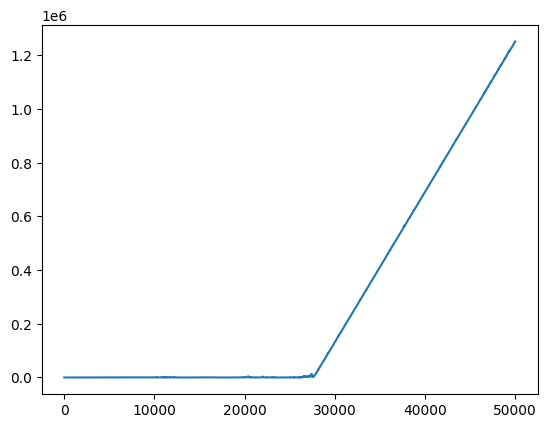

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['step'],df["system_total_waiting_time"])